Accuracy of training: 0.927
Accuracy of training: 0.987


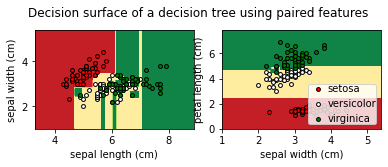

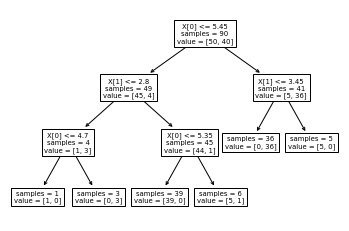

Features importances
[0.70377444 0.29622556]


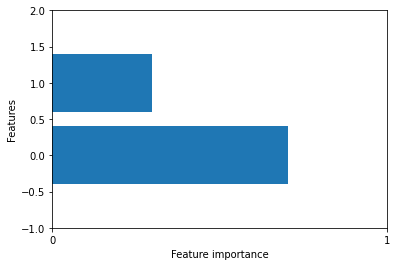

In [1]:
## import NumPy and Mathplot libraries
import numpy as np
import matplotlib.pyplot as plt

## load the data and the decision tree classifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# define the algorithm meta-parameters
## number of classes
n_classes = 3
## define the colours for the plot
plot_colors = "rwg"
## define a step for the plot
plot_step = 0.02

# Load the data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], 
                                [1, 2]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

# print the accuracy of training
    print("Accuracy of training: {:.3f}".format(clf.score(X, y)))    

    # Plot the decision boundary
    plt.subplot(2, 2, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn)

## Plot the results
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlGn, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

## sub-select the first 90 data samples with two features 
a=iris.data[0:90,0:2]
b=iris.target[0:90]

## Plot the decision tree
plt.figure()
clf = DecisionTreeClassifier(max_depth=3, random_state=0).fit(a, b)
plot_tree(clf, impurity=False, filled=False)
plt.show()

## plot the importance of the two features considered
n_features=2
plt.barh(np.arange(n_features),clf.feature_importances_, align='center')
plt.xticks(np.arange(n_features))
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1,n_features)

# # print the accuracy of training
# print("Accuracy of training: {:.3f}".format(clf.score(X, y)))

print("Features importances")
print(clf.feature_importances_)